In [1]:
## Storage for all classification reports

all_reports =[]
def store_report(report_dict, model_name, phase, storage_list,
                 U_min=None, U_max=None, mu_min=None, mu_max=None, U_step=None, mu_step=None):
    """
    Store classification report with model, phase, and grid parameters.
    """
    for cls, metrics in report_dict.items():
        if isinstance(metrics, dict): # per-class or averages
            storage_list.append({
                "Model": model_name,
                "Phase": phase,
                "Class": str(cls),
                "precision": metrics.get("precision"),
                "recall": metrics.get("recall"),
                "f1-score": metrics.get("f1-score"),
                "support": metrics.get("support"),
                "U_min": U_min, "U_max": U_max,
                "mu_min": mu_min, "mu_max": mu_max,
                "U_step": U_step, "mu_step": mu_step
            })
        else:                # e.g. "accuracy": float
            storage_list.append({
                "Model": model_name,
                "Phase": phase,
                "Class": str(cls),
                "precision": None,
                "recall": None,
                "f1-score": metrics,
                "support": None,
                "U_min": U_min, "U_max": U_max,
                "mu_min": mu_min, "mu_max": mu_max,
                "U_step": U_step, "mu_step": mu_step
            })


# def store_report(report_dict, model_name, phase, storage_list):
#     """
#     Convert classification_report (output_dict=True) into a flat list of dicts
#     with Model and Phase tags, and append to storage_list.
#     """
#     for cls, metrics in report_dict.items():
#         if isinstance(metrics, dict):  # normal per-class or avg metrics
#             storage_list.append({
#                 "Model": model_name,
#                 "Phase": phase,
#                 "Class": str(cls),
#                 "precision": metrics.get("precision", None),
#                 "recall": metrics.get("recall", None),
#                 "f1-score": metrics.get("f1-score", None),
#                 "support": metrics.get("support", None)
#             })
#         else:  # sometimes accuracy is just a float
#             storage_list.append({
#                 "Model": model_name,
#                 "Phase": phase,
#                 "Class": str(cls),
#                 "precision": None,
#                 "recall": None,
#                 "f1-score": metrics,
#                 "support": None
#             })

In [2]:
# ================================
# Phase Classification: Clean Setup
# (features = [Ubar, Mubar] only)
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [3]:
# def run_models(
#     models,X ,y ,
#     U_min=0.0, U_max=15.0, 
#     mu_min=0.0, mu_max=50.0, 
#     U_step=0.1, mu_step=0.1
# ):
#     """
#     Run training, evaluation, decision boundary plotting, and prediction reports.
#     Default grid limits: U∈[0,15], μ∈[0,50], step=0.1.
#     Override using keyword args, e.g. run_models(models, U_max=25, mu_max=60).
#     """


#     # Train/test split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y,
#         test_size=0.25, random_state=42,
#         stratify=y
#     )

#     #Plot True phase diagram
#     plt.figure(figsize=(9,6))
#     plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue','red']))
#     plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
#     plt.clim(-0.5, 1.5)
#     plt.xlabel("Ū"); plt.ylabel("μ̄")
#     plt.title("True Phase Diagram")
#     plt.grid(True)
#     plt.show()
 
#     '''
#     ---------- 3) Train + Evaluate ----------
#     '''

#     # ---------- 4) Plot decision boundary on training domain ----------
#     def plot_decision_boundary(model, X, y, title="Decision Boundary", grid_res=300):
#         x_min, x_max = X["Ubar"].min(), X["Ubar"].max()
#         y_min, y_max = X["Mubar"].min(), X["Mubar"].max()

#             # Clip negatives if needed
#         x_min = max(0, x_min)
#         y_min = max(0, y_min)


#         xx, yy = np.meshgrid(
#             np.linspace(x_min, x_max, grid_res),
#             np.linspace(y_min, y_max, grid_res)
#         )
#         grid_df = pd.DataFrame({"Ubar": xx.ravel(), "Mubar": yy.ravel()})
#         Z = model.predict(grid_df).reshape(xx.shape)
    
    
#         plt.figure(figsize=(9, 6))
#         plt.contourf(xx, yy, Z, cmap=ListedColormap(['gray', 'orange']), alpha=0.5)

#             # Filter training points so negative μ̄ don’t affect the axis
#         mask = X["Mubar"] >= 0
#         plt.scatter(
#             X.loc[mask, "Ubar"], 
#             X.loc[mask, "Mubar"], 
#             c=y.loc[mask],
#             s=10, cmap=ListedColormap(['blue', 'red']),
#             edgecolor='k', linewidth=0.2
#         )
#         # plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue', 'red']), edgecolor='k', linewidth=0.2)
#         plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
#         plt.clim(-0.5, 1.5)
#         plt.xlabel("Ū")
#         plt.ylabel("μ̄")
#         plt.title(title)
#         plt.grid(True)
#         plt.show()

        
#     # def train_test(models,X_tain,y_train):
#     for name, model in models.items():
#             model.fit(X_train, y_train)

#             # Plot Training Results 
            
#             # plot_decision_boundary(model, X, y, title="T", grid_res=300):
            
#             y_pred = model.predict(X_test)
#             print(f"\n📊 Classification Report for {name}:")
#             report_test = classification_report(y_test, y_pred, digits=4, output_dict=True)
#             store_report(report_test, name, "test", all_reports,
#                          U_min, U_max, mu_min, mu_max, U_step, mu_step)
#             print(classification_report(y_test, y_pred, digits=4))
    
        
    
    
#     for name,model  in models.items():
#         # Choose your favorite model (often SVM-RBF or LogReg-Poly2 generalize best)
#         clf = model  # or "LogReg-Poly2" or "RF-Shallow"
        
#         plot_decision_boundary(clf, X, y, title="Decision Boundary on Training Domain")
        
#         # # ---------- 5) Predict on an extended grid (extrapolation) ----------
#         # U_min, U_max = 0.0, 15.0   # extend beyond training range
#         # mu_min, mu_max = 0.0, 50.0
#         # U_step, mu_step = 0.1, 0.1
    
        
#         U_vals = np.arange(U_min, U_max + U_step, U_step)
#         mu_vals = np.arange(mu_min, mu_max + mu_step, mu_step)
#         U_grid, mu_grid = np.meshgrid(U_vals, mu_vals)
        
#         grid_ext = pd.DataFrame({
#             "Ubar": U_grid.ravel(),
#             "Mubar": mu_grid.ravel()
#         })
        
#         pred_ext = clf.predict(grid_ext)
    
#         phase_map = pred_ext.reshape(U_grid.shape)
        
#         plt.figure(figsize=(9, 6))

#         # if we want to see the predict of unknown datapoints and tarining prediction on the known datapoints comparisions
#         # # Background prediction (gray/orange)
#         # plt.contourf(U_grid, mu_grid, phase_map, cmap=ListedColormap(['gray', 'orange']), alpha=0.5)
        
#         # # Overlay true training data (blue/red)
#         # plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue', 'red']), edgecolor='k', linewidth=0.2)
        

#         plt.contourf(U_grid, mu_grid, phase_map, cmap=ListedColormap(['gray', 'orange']), alpha=0.7)
#         plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
#         plt.clim(-0.5, 1.5)
#         plt.xlabel("Ū")
#         plt.ylabel("μ̄")
#         plt.title("Predicted Phase Diagram for Model ")
#         plt.grid(True)
#         plt.show()
        
#         # ---------- 6) OPTIONAL: Evaluate predictions vs ground truth where available ----------
#         # Only compare inside the original data domain (U≤15, μ≤50)
#         mask_domain = (grid_ext["Ubar"] <= X["Ubar"].max()) & (grid_ext["Mubar"] <= X["Mubar"].max())
#         grid_in_domain = grid_ext[mask_domain].copy()
#         pred_in_domain = clf.predict(grid_in_domain)
          
       
#         df_lookup = df.copy()
#         df_lookup["Ubar_r"] = df_lookup["Ubar"].round(1)
#         df_lookup["Mubar_r"] = df_lookup["Mubar"].round(1)
#         lookup = df_lookup.groupby(["Ubar_r", "Mubar_r"])["Phase"].mean().round().astype(int).reset_index()
#         lookup = lookup.set_index(["Ubar_r", "Mubar_r"])["Phase"]
        
#         grid_in_domain["Ubar_r"] = grid_in_domain["Ubar"].round(1)
#         grid_in_domain["Mubar_r"] = grid_in_domain["Mubar"].round(1)
#         true_labels = lookup.reindex(list(zip(grid_in_domain["Ubar_r"], grid_in_domain["Mubar_r"]))).values
        
#         # Drop NaNs (grid points that don't map exactly to a dataset point)
#         valid = ~pd.isna(true_labels)
#         true_labels = true_labels[valid].astype(int)
#         pred_labels = pred_in_domain[valid]
        
#         print(f"\n📊 Classification Report For Prediction using Model {name} :")
#         report_pred = classification_report(true_labels, pred_labels, digits=4, output_dict=True)
#         store_report(report_pred, name, "prediction", all_reports,
#                      U_min, U_max, mu_min, mu_max, U_step, mu_step)
#         print(classification_report(true_labels, pred_labels, digits=4))


In [16]:
def run_models(models, X, y, all_reports=None,
               U_min=0.0, U_max=15.0, mu_min=0.0, mu_max=50.0,
               U_step=0.1, mu_step=0.1, grid_res=300):
    """
    Run training, evaluation, and plot phase diagrams.
    Shows:
      1) True phase diagram
      2) Training prediction (model learned)
      3) Prediction on test/extended grid
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report

    # Helper plotting function
    def plot_phase(X_points, y_points, Z_grid=None, xx=None, yy=None, title="Phase Diagram"):
        plt.figure(figsize=(9,6))
        if Z_grid is not None:
            plt.contourf(xx, yy, Z_grid, cmap=ListedColormap(['gray','orange']), alpha=0.7)
        mask = X_points["Mubar"] >= 0
        plt.scatter(X_points.loc[mask, "Ubar"], X_points.loc[mask, "Mubar"],
                    c=y_points.loc[mask], s=10,
                    cmap=ListedColormap(['blue','red']),
                    edgecolor='k', linewidth=0.2)
        plt.colorbar(ticks=[0,1], label="Phase (0=Mott, 1=SF)")
        plt.clim(-0.5,1.5)
        plt.xlabel("Ū"); plt.ylabel("μ̄")
        plt.title(title)
        plt.grid(True)
        plt.show()

    # 1) Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # 2) True phase diagram
    plot_phase(X, y, title="True Phase Diagram")

    # 3) Train models
    for name, model in models.items():
        model.fit(X_train, y_train)

        # ----- Training prediction on training grid -----
        x_min, x_max = X_train["Ubar"].min(), X_train["Ubar"].max()
        y_min, y_max = X_train["Mubar"].min(), X_train["Mubar"].max()
        xx_train, yy_train = np.meshgrid(
            np.linspace(x_min, x_max, grid_res),
            np.linspace(y_min, y_max, grid_res)
        )
        grid_train = pd.DataFrame({"Ubar": xx_train.ravel(), "Mubar": yy_train.ravel()})
        Z_train = model.predict(grid_train).reshape(xx_train.shape)
        plot_phase(X_train, y_train, Z_train, xx_train, yy_train, title=f"{name} - Training Prediction")

        # ----- Test predictions (scatter only) -----
        y_test_pred = model.predict(X_test)
        plot_phase(X_test, pd.Series(y_test_pred, index=X_test.index), title=f"{name} - Testing Prediction")

        # ----- Classification report for test set -----
        print(f"\n📊 Classification Report for {name} on Testing Data:")
        report_test = classification_report(y_test, y_test_pred, digits=4, output_dict=True)
        if all_reports is not None:
            store_report(report_test, name, "test", all_reports,
                         U_min, U_max, mu_min, mu_max, U_step, mu_step)
        print(classification_report(y_test, y_test_pred, digits=4))

        # ----- Optional: Extended grid predictions -----
        U_vals = np.arange(U_min, U_max + U_step, U_step)
        mu_vals = np.arange(mu_min, mu_max + mu_step, mu_step)
        U_grid, mu_grid = np.meshgrid(U_vals, mu_vals)
        grid_ext = pd.DataFrame({"Ubar": U_grid.ravel(), "Mubar": mu_grid.ravel()})
        pred_ext = model.predict(grid_ext)
        Z_ext = pred_ext.reshape(U_grid.shape)
        plot_phase(grid_ext, pd.Series(pred_ext, index=grid_ext.index), Z_ext, U_grid, mu_grid,
                   title=f"{name} - Extended Grid Prediction")

        # ----- Optional: Evaluate extended grid vs ground truth if available -----
        df_lookup = X.copy()  # replace X with original df if needed
        df_lookup["Ubar_r"] = df_lookup["Ubar"].round(1)
        df_lookup["Mubar_r"] = df_lookup["Mubar"].round(1)
        lookup = df_lookup.groupby(["Ubar_r", "Mubar_r"])["Phase"].mean().round().astype(int).reset_index()
        lookup = lookup.set_index(["Ubar_r","Mubar_r"])["Phase"]
        grid_ext["Ubar_r"] = grid_ext["Ubar"].round(1)
        grid_ext["Mubar_r"] = grid_ext["Mubar"].round(1)
        true_labels = lookup.reindex(list(zip(grid_ext["Ubar_r"], grid_ext["Mubar_r"]))).values
        valid = ~pd.isna(true_labels)
        true_labels = true_labels[valid].astype(int)
        pred_labels = pred_ext[valid]

        print(f"\n📊 Classification Report for {name} on Extended Grid:")
        report_pred = classification_report(true_labels, pred_labels, digits=4, output_dict=True)
        if all_reports is not None:
            store_report(report_pred, name, "prediction", all_reports,
                         U_min, U_max, mu_min, mu_max, U_step, mu_step)
        print(classification_report(true_labels, pred_labels, digits=4))


In [20]:
def run_models1(
    models,X ,y ,
    U_min=0.0, U_max=15.0, 
    mu_min=0.0, mu_max=50.0, 
    U_step=0.1, mu_step=0.1
):
    """
    Run training, evaluation, decision boundary plotting, and prediction reports.
    Default grid limits: U∈[0,15], μ∈[0,50], step=0.1.
    Override using keyword args, e.g. run_models(models, U_max=25, mu_max=60).
    """


    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.25, random_state=42,
        stratify=y
    )

    #Plot True phase diagram
    plt.figure(figsize=(9,6))
    plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue','red']))
    plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
    plt.clim(-0.5, 1.5)
    plt.xlabel("Ū"); plt.ylabel("μ̄")
    plt.title("True Phase Diagram")
    plt.grid(True)
    plt.show()
 
    '''
    ---------- 3) Train + Evaluate ----------
    '''

    # ---------- 4) Plot decision boundary on training domain ----------
    def plot_decision_boundary(model, X, y, title="Decision Boundary", grid_res=300):
        x_min, x_max = X["Ubar"].min(), X["Ubar"].max()
        y_min, y_max = X["Mubar"].min(), X["Mubar"].max()

            # Clip negatives if needed
        x_min = max(0, x_min)
        y_min = max(0, y_min)


        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, grid_res),
            np.linspace(y_min, y_max, grid_res)
        )
        grid_df = pd.DataFrame({"Ubar": xx.ravel(), "Mubar": yy.ravel()})
        Z = model.predict(grid_df).reshape(xx.shape)
    
    
        plt.figure(figsize=(9, 6))
        plt.contourf(xx, yy, Z, cmap=ListedColormap(['green', 'magenta']), alpha=0.5)

            # Filter training points so negative μ̄ don’t affect the axis
        mask = X["Mubar"] >= 0
        plt.scatter(
            X.loc[mask, "Ubar"], 
            X.loc[mask, "Mubar"], 
            c=y.loc[mask],
            s=10, cmap=ListedColormap(['blue', 'red']),
            edgecolor='k', linewidth=0.2
        )
        # plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue', 'red']), edgecolor='k', linewidth=0.2)
        plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
        plt.clim(-0.5, 1.5)
        plt.xlabel("Ū")
        plt.ylabel("μ̄")
        plt.title(title)
        plt.grid(True)
        plt.show()

        
    # def train_test(models,X_tain,y_train):
    for name, model in models.items():
            model.fit(X_train, y_train)

            # Plot Training Results 
            
            # plot_decision_boundary(model, X, y, title="T", grid_res=300):
            
            y_pred = model.predict(X_test)
            print(f"\n📊 Classification Report for {name}:")
            report_test = classification_report(y_test, y_pred, digits=4, output_dict=True)
            store_report(report_test, name, "test", all_reports,
                         U_min, U_max, mu_min, mu_max, U_step, mu_step)
            print(classification_report(y_test, y_pred, digits=4))
    
        
    
    
    for name,model  in models.items():
        # Choose your favorite model (often SVM-RBF or LogReg-Poly2 generalize best)
        clf = model  # or "LogReg-Poly2" or "RF-Shallow"
        
        plot_decision_boundary(clf, X, y, title="Decision Boundary on Training Domain")
        
        # # ---------- 5) Predict on an extended grid (extrapolation) ----------
        # U_min, U_max = 0.0, 15.0   # extend beyond training range
        # mu_min, mu_max = 0.0, 50.0
        # U_step, mu_step = 0.1, 0.1
    
        
        U_vals = np.arange(U_min, U_max + U_step, U_step)
        mu_vals = np.arange(mu_min, mu_max + mu_step, mu_step)
        U_grid, mu_grid = np.meshgrid(U_vals, mu_vals)
        
        grid_ext = pd.DataFrame({
            "Ubar": U_grid.ravel(),
            "Mubar": mu_grid.ravel()
        })
        
        pred_ext = clf.predict(grid_ext)
    
        phase_map = pred_ext.reshape(U_grid.shape)
        
        plt.figure(figsize=(9, 6))

        # if we want to see the predict of unknown datapoints and tarining prediction on the known datapoints comparisions
        # # Background prediction (gray/orange)
        # plt.contourf(U_grid, mu_grid, phase_map, cmap=ListedColormap(['gray', 'orange']), alpha=0.5)
        
        # # Overlay true training data (blue/red)
        # plt.scatter(X["Ubar"], X["Mubar"], c=y, s=10, cmap=ListedColormap(['blue', 'red']), edgecolor='k', linewidth=0.2)
        

        plt.contourf(U_grid, mu_grid, phase_map, cmap=ListedColormap(['gray', 'orange']), alpha=0.7)
        plt.colorbar(ticks=[0, 1], label="Phase (0=Mott, 1=SF)")
        plt.clim(-0.5, 1.5)
        plt.xlabel("Ū")
        plt.ylabel("μ̄")
        plt.title("Predicted Phase Diagram for Model ")
        plt.grid(True)
        plt.show()
        
        # ---------- 6) OPTIONAL: Evaluate predictions vs ground truth where available ----------
        # Only compare inside the original data domain (U≤15, μ≤50)
        mask_domain = (grid_ext["Ubar"] <= X["Ubar"].max()) & (grid_ext["Mubar"] <= X["Mubar"].max())
        grid_in_domain = grid_ext[mask_domain].copy()
        pred_in_domain = clf.predict(grid_in_domain)
          
       
        df_lookup = df.copy()
        df_lookup["Ubar_r"] = df_lookup["Ubar"].round(1)
        df_lookup["Mubar_r"] = df_lookup["Mubar"].round(1)
        lookup = df_lookup.groupby(["Ubar_r", "Mubar_r"])["Phase"].mean().round().astype(int).reset_index()
        lookup = lookup.set_index(["Ubar_r", "Mubar_r"])["Phase"]
        
        grid_in_domain["Ubar_r"] = grid_in_domain["Ubar"].round(1)
        grid_in_domain["Mubar_r"] = grid_in_domain["Mubar"].round(1)
        true_labels = lookup.reindex(list(zip(grid_in_domain["Ubar_r"], grid_in_domain["Mubar_r"]))).values
        
        # Drop NaNs (grid points that don't map exactly to a dataset point)
        valid = ~pd.isna(true_labels)
        true_labels = true_labels[valid].astype(int)
        pred_labels = pred_in_domain[valid]
        
        print(f"\n📊 Classification Report For Prediction using Model {name} :")
        report_pred = classification_report(true_labels, pred_labels, digits=4, output_dict=True)
        store_report(report_pred, name, "prediction", all_reports,
                     U_min, U_max, mu_min, mu_max, U_step, mu_step)
        print(classification_report(true_labels, pred_labels, digits=4))


In [17]:
# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U15.0-(0.1)_Mu50.0-(0.1).csv")

# Label: 1 = Superfluid, 0 = Mott
df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# Features and target: **only** Ubar, Mubar
X = df[["Ubar", "Mubar"]].copy()
y = df["Phase"].copy()

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.25, random_state=42,
#     stratify=y
# )

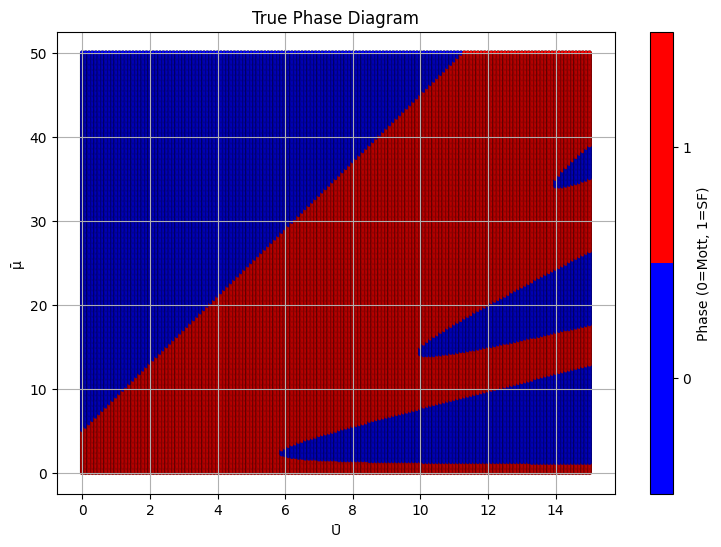

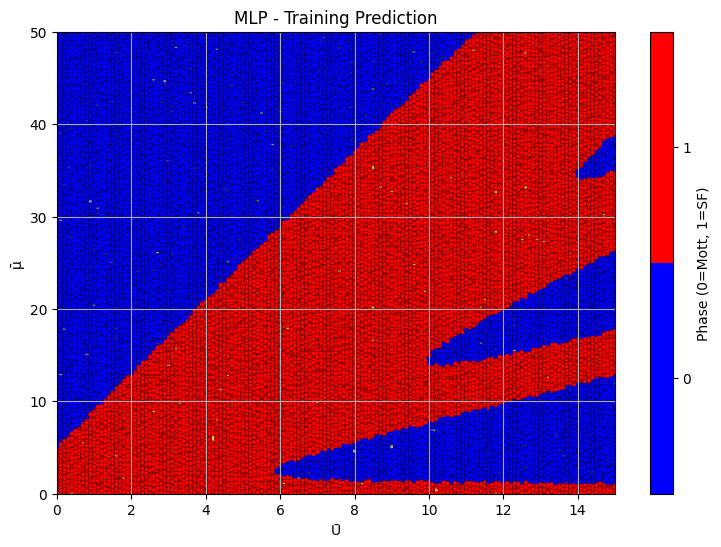

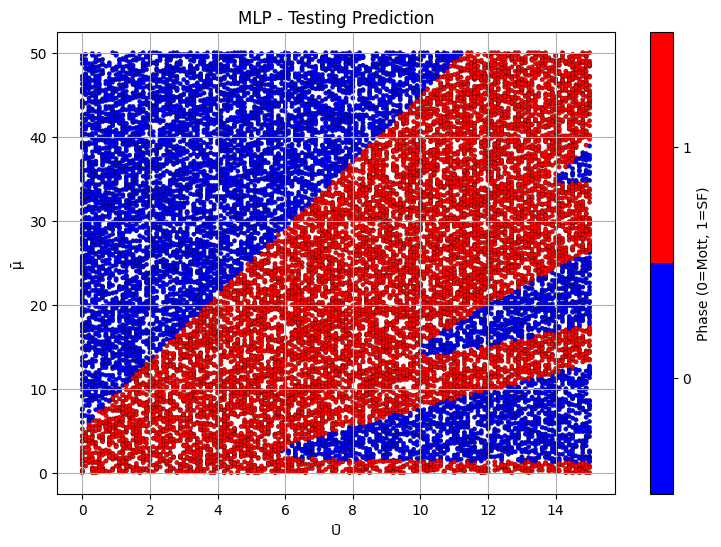


📊 Classification Report for MLP on Testing Data:
              precision    recall  f1-score   support

           0     0.9992    0.9884    0.9938      8704
           1     0.9902    0.9993    0.9947     10209

    accuracy                         0.9943     18913
   macro avg     0.9947    0.9939    0.9942     18913
weighted avg     0.9943    0.9943    0.9943     18913



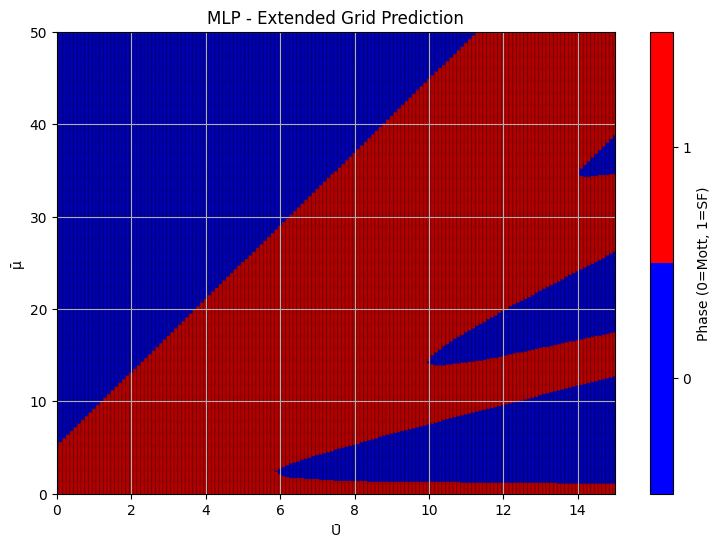

KeyError: 'Column not found: Phase'

In [18]:

# Model 
mlp = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42))
    ])

models = {
    "MLP": mlp
}

run_models(models,X,y) 

In [21]:

# ---------- 1) Load and label ----------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Label: 1 = Superfluid, 0 = Mott
df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# Features and target: **only** Ubar, Mubar
X = df[["Ubar", "Mubar"]].copy()
y = df["Phase"].copy()


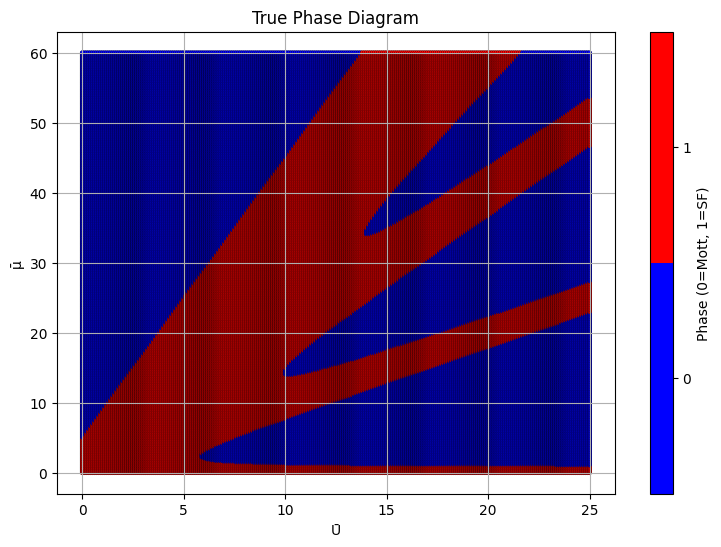

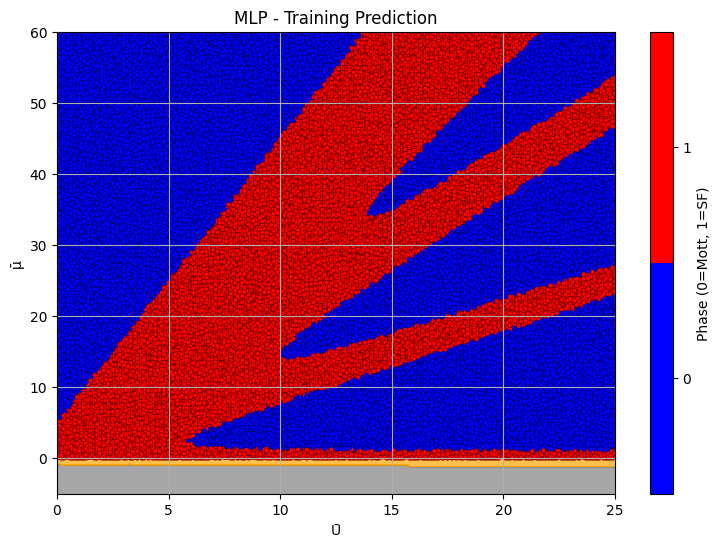

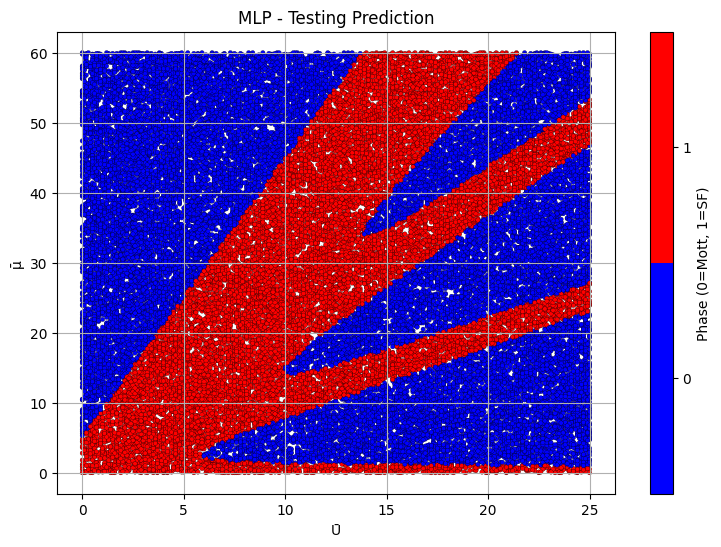


📊 Classification Report for MLP on Testing Data:
              precision    recall  f1-score   support

           0     0.9889    0.9984    0.9936     24363
           1     0.9976    0.9835    0.9905     16488

    accuracy                         0.9924     40851
   macro avg     0.9933    0.9910    0.9921     40851
weighted avg     0.9924    0.9924    0.9924     40851



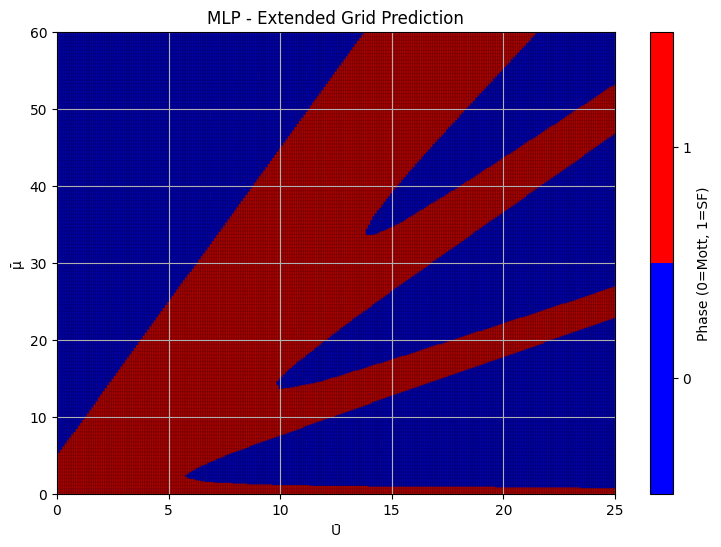

KeyError: 'Column not found: Phase'

In [22]:

# Model 
mlp = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42))
    ])

models = {
    "MLP": mlp
}

run_models(models, X, y,U_max=25, mu_max=60)